# NBA Data Cleaning

The goal is to combine the 3 datasets we scraped into 1.

To do this we'll need to clean the data, make it uniform and merge it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cleaning Past MVP Winners Dataset

In [2]:
mvps = pd.read_csv("mvp//mvps.csv")
mvps

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,7,8,Stephen Curry,33,GSW,0.0,4.0,1000,0.004,64,...,5.2,6.3,1.3,0.4,0.437,0.380,0.923,8.0,0.173,2022
482,8,9,Chris Paul,36,PHO,0.0,2.0,1000,0.002,65,...,4.4,10.8,1.9,0.3,0.493,0.317,0.837,9.4,0.210,2022
483,9,10T,DeMar DeRozan,32,CHI,0.0,1.0,1000,0.001,76,...,5.2,4.9,0.9,0.3,0.504,0.352,0.877,8.8,0.154,2022
484,10,10T,Kevin Durant,33,BRK,0.0,1.0,1000,0.001,55,...,7.4,6.4,0.9,0.9,0.518,0.383,0.910,8.4,0.198,2022


Data about rebounds, assists, steals etc. are at the players.csv file,

So we're selecting only relevent columns from the dataset.

In [3]:
mvps = mvps[['Player', 'Year', 'Pts Won', 'Pts Max', 'Share']]

In [4]:
mvps.head()

,Player,Year,Pts Won,Pts Max,Share
0,Michael Jordan,1991,891.0,960,0.928
1,Magic Johnson,1991,497.0,960,0.518
2,David Robinson,1991,476.0,960,0.496
3,Charles Barkley,1991,222.0,960,0.231
4,Karl Malone,1991,142.0,960,0.148


## Cleaning Players Stats Dataset

In [5]:
players = pd.read_csv("player//players.csv")
players

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,836,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
18881,837,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
18882,838,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022
18883,839,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022


deleting unnecessary columns

In [6]:
players = players.drop(columns=['Unnamed: 0', 'Rk'])

I want to merge the mvps and players datasets,

But few players in the players dataset have an asterisk at the end of their name, e.g. Charles Barkley.

Let's fix that.

In [7]:
players[players['Player'].str.contains('*',regex=False)].head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
23,Charles Barkley*,SF,27,PHI,67,67,37.3,9.9,17.4,.570,...,3.9,6.3,10.1,4.2,1.6,0.5,3.1,2.6,27.6,1991
34,Larry Bird*,SF,34,BOS,60,60,38.0,7.7,17.0,.454,...,0.9,7.6,8.5,7.2,1.8,1.0,3.1,2.0,19.4,1991
71,Maurice Cheeks*,PG,34,NYK,76,64,28.3,3.2,6.4,.499,...,0.3,2.0,2.3,5.7,1.7,0.1,1.4,1.8,7.8,1991
89,Adrian Dantley*,SF,35,MIL,10,0,12.6,1.9,5.0,.380,...,0.8,0.5,1.3,0.9,0.5,0.0,0.6,0.8,5.7,1991
102,Vlade Divac*,C,22,LAL,82,81,28.2,4.4,7.8,.565,...,2.5,5.6,8.1,1.1,1.3,1.5,1.8,3.0,11.2,1991


In [8]:
players['Player'] = players['Player'].str.replace('*','', regex=False)

A few players have multiple rows for the same year, as they have played for different teams, (e.g. Greg Anderson rows 8-11) .

I only want the total stats for that year.

I'm creating groups for each player for each year.

The function 'merge_rows' checks if the number of rows is greater than 1.

If it is, return the total stats row, and set the team to the latest he played in.

In [9]:
def merge_rows (group):
    
    # Did he play for multiple teams? Check for number of rows
    if group.shape[0] > 1: 

        # Keep only the total row
        total_row = group[group['Tm']=='TOT']

        # Set team to the latest he played in
        total_row['Tm'] = group.iloc[-1,:]['Tm']
        return total_row
    
    return group

In [10]:
players = players.groupby(['Player', 'Year']).apply(merge_rows)

In [11]:
players[players['Player']=='Greg Anderson']

Player Pos Age   Tm   G  GS    MP   FG   FGA  \
Player        Year                                                             
Greg Anderson 1991 8     Greg Anderson  PF  26  DEN  68   2  13.6  1.7   4.0   
              1992 467   Greg Anderson  PF  27  DEN  82  82  34.1  4.7  10.4   
              1994 1412  Greg Anderson  PF  29  DET  77  47  21.1  2.6   4.8   
              1995 1911  Greg Anderson  PF  30  ATL  51   0  12.2  1.1   2.0   
              1996 2381  Greg Anderson  PF  31  SAS  46   7   7.5  0.5   1.0   
              1997 2948  Greg Anderson   C  32  SAS  82  48  20.2  1.6   3.2   
              1998 3541  Greg Anderson   C  33  ATL  50   0   8.0  0.7   1.6   

                          FG%  ...  ORB  DRB   TRB  AST  STL  BLK  TOV   PF  \
Player        Year             ...                                            
Greg Anderson 1991 8     .430  ...  1.4  3.3   4.7  0.2  0.5  0.7  1.2  2.1   
              1992 467   .456  ...  4.1  7.4  11.5  1.0  1.1  0.8  2.5  3.2   
              1994 1412  .543  ...  2.4  5.0   7.4  0.7  0.7  0.9  1.2  3.0   
              1995 1911  .548  ...  1.2  2.5   3.7  0.3  0.5  0.6  0.6  2.0   
              1996 2381  .511  ...  0.6  1.5   2.2  0.2  0.2  0.5  0.5  1.4   
              1997 2948  .496  ...  1.9  3.5   5.5  0.4  0.8  0.8  0.9  2.7   
              1998 3541  .444  ...  0.8  1.6   2.4  0.3  0.4  0.2  0.3  1.7   

                          PTS  Year  
Player        Year                   
Greg Anderson 1991 8      4.3  1991  
              1992 467   11.5  1992  
              1994 1412   6.4  1994  
              1995 1911   2.9  1995  
              1996 2381   1.2  1996  
              1997 2948   3.9  1997  
              1998 3541   1.8  1998  

[7 rows x 30 columns]

Getting rid of 2 index levels (Player & Year) to get back to the original shape of the database.

In [12]:
players.index = players.index.droplevel()
players.index = players.index.droplevel()

### Merging players and mvps

Merging the players and mvps datasets using outer Merge, as not all the players are in the mvps dataset.

In [13]:
players_mvps = players.merge(mvps, how='outer', on=['Player','Year'])

In [14]:
players_mvps[players_mvps['Player']=='Kobe Bryant'].head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
8384,Kobe Bryant,SF,18,LAL,71,6,15.5,2.5,5.9,.417,...,1.3,0.7,0.3,1.6,1.4,7.6,1997,NaN,NaN,NaN
8385,Kobe Bryant,SF,19,LAL,79,1,26.0,4.9,11.6,.428,...,2.5,0.9,0.5,2.0,2.3,15.4,1998,NaN,NaN,NaN
8386,Kobe Bryant,SG,20,LAL,50,50,37.9,7.2,15.6,.465,...,3.8,1.4,1.0,3.1,3.1,19.9,1999,NaN,NaN,NaN
8387,Kobe Bryant,SG,21,LAL,66,62,38.2,8.4,17.9,.468,...,4.9,1.6,0.9,2.8,3.3,22.5,2000,3.0,1210.0,0.002
8388,Kobe Bryant,SG,22,LAL,68,68,40.9,10.3,22.2,.464,...,5.0,1.7,0.6,3.2,3.3,28.5,2001,11.0,1240.0,0.009


Now we need to deal with NaN values for the Pts Won, Pts Max and Share columns.

These are NaN values because at that year, the player got 0 votes.

So replacing these values with 0's makes sense.

In [15]:
players_mvps[['Pts Won','Pts Max', 'Share']] = players_mvps[['Pts Won','Pts Max', 'Share']].fillna(0)

In [16]:
players_mvps[players_mvps['Player'] == 'Kobe Bryant'].head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
8384,Kobe Bryant,SF,18,LAL,71,6,15.5,2.5,5.9,.417,...,1.3,0.7,0.3,1.6,1.4,7.6,1997,0.0,0.0,0.000
8385,Kobe Bryant,SF,19,LAL,79,1,26.0,4.9,11.6,.428,...,2.5,0.9,0.5,2.0,2.3,15.4,1998,0.0,0.0,0.000
8386,Kobe Bryant,SG,20,LAL,50,50,37.9,7.2,15.6,.465,...,3.8,1.4,1.0,3.1,3.1,19.9,1999,0.0,0.0,0.000
8387,Kobe Bryant,SG,21,LAL,66,62,38.2,8.4,17.9,.468,...,4.9,1.6,0.9,2.8,3.3,22.5,2000,3.0,1210.0,0.002
8388,Kobe Bryant,SG,22,LAL,68,68,40.9,10.3,22.2,.464,...,5.0,1.7,0.6,3.2,3.3,28.5,2001,11.0,1240.0,0.009


## Cleaning Teams Stats Dataset

In [17]:
teams = pd.read_csv("team//teams.csv")
teams

,Unnamed: 0,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Conference
0,0,Boston Celtics*,56,26,.683,—,111.5,105.7,5.22,1991,East
1,1,Philadelphia 76ers*,44,38,.537,12.0,105.4,105.6,-0.39,1991,East
2,2,New York Knicks*,39,43,.476,17.0,103.1,103.3,-0.43,1991,East
3,3,Washington Bullets,30,52,.366,26.0,101.4,106.4,-4.84,1991,East
4,4,New Jersey Nets,26,56,.317,30.0,102.9,107.5,-4.53,1991,East
...,...,...,...,...,...,...,...,...,...,...,...
1063,13,Memphis Grizzlies*,56,26,.683,—,115.6,109.9,5.37,2022,West
1064,14,Dallas Mavericks*,52,30,.634,4.0,108.0,104.7,3.12,2022,West
1065,15,New Orleans Pelicans*,36,46,.439,20.0,109.3,110.3,-0.84,2022,West
1066,16,San Antonio Spurs,34,48,.415,22.0,113.2,113.0,0.02,2022,West


Removing asterisks from the end of team names.

In [18]:
teams['Team'] = teams['Team'].str.replace('*','',regex=False)

Removing unnecessary columns

In [19]:
teams = teams.drop(columns='Unnamed: 0')

The headers of divisions are repeating. Lets remove that.

In [20]:
teams[teams["W"].str.contains("Division")].head()

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Conference
6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,East
14,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,1991,West
22,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,1991,West
37,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1992,East
45,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,1992,West


In [21]:
teams = teams[~teams["W"].str.contains("Division")]

There is a mismatch between the team names in the players_mvps dataset and the teams dataset.

In [22]:
players_mvps['Tm'].unique()

array(['LAL', 'PHO', 'DAL', 'MIA', 'CLE', 'WSB', 'CHI', 'GSW', 'IND',
       'WAS', 'MIN', 'BOS', 'HOU', 'DEN', 'ORL', 'NOH', 'TOR', 'SAC',
       'CHO', 'PHI', 'POR', 'DET', 'OKC', 'UTA', 'MIL', 'VAN', 'SEA',
       'NJN', 'NOK', 'LAC', 'ATL', 'CHA', 'MEM', 'NYK', 'NOP', 'BRK',
       'SAS', 'CHH'], dtype=object)

In [23]:
teams['Team'].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'New York Knicks',
       'Washington Bullets', 'New Jersey Nets', 'Miami Heat',
       'Chicago Bulls', 'Detroit Pistons', 'Milwaukee Bucks',
       'Atlanta Hawks', 'Indiana Pacers', 'Cleveland Cavaliers',
       'Charlotte Hornets', 'San Antonio Spurs', 'Utah Jazz',
       'Houston Rockets', 'Orlando Magic', 'Minnesota Timberwolves',
       'Dallas Mavericks', 'Denver Nuggets', 'Portland Trail Blazers',
       'Los Angeles Lakers', 'Phoenix Suns', 'Golden State Warriors',
       'Seattle SuperSonics', 'Los Angeles Clippers', 'Sacramento Kings',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

To overcome this I downloaded data about team names and abbreviations from wikipedia at this url: https://en.wikipedia.org/wiki/Wikipedia:WikiProject_National_Basketball_Association/National_Basketball_Association_team_abbreviations

And then added manually few abbreviations that were missing (such as BRK for Brooklyn Nets).

In [24]:
abbrevs = pd.read_csv('abbreviations.csv')
abbrevs.head()

,Abbreviation,Name
0,ATL,Atlanta Hawks
1,BRK,Brooklyn Nets
2,BKN,Brooklyn Nets
3,BOS,Boston Celtics
4,CHA,Charlotte Bobcats


Inserting the data into a dictionary.

In [25]:
nicknames = {}

with open('abbreviations.csv') as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace('\n','').split(',')
        nicknames[abbrev] = name

Using the map function to add the full team names.

In [26]:
players_mvps['Team'] = players_mvps['Tm'].map(nicknames)

### Merging players_mvps and teams

Merging players_mvps and teams to one dataset.

In [27]:
stats = players_mvps.merge(teams, how='outer', on=['Team', 'Year'])

In [28]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Conference
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73,West
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,.477,...,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73,West
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,.455,...,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73,West
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,.340,...,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73,West
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,.492,...,0.0,Los Angeles Lakers,58,24,.707,5.0,106.3,99.6,6.73,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14692,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,.484,...,0.0,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45,East
14693,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,.286,...,0.0,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45,East
14694,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,.470,...,0.0,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45,East
14695,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,.459,...,0.0,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45,East


In [29]:
# Same number of rows after merge is a sign the merge went well.
players_mvps.shape

(14697, 34)

Many of the numerical values are object type.

We'll change that so it's easier to use later.

In [30]:
stats.dtypes

Player         object
Pos            object
Age            object
Tm             object
G              object
GS             object
MP             object
FG             object
FGA            object
FG%            object
3P             object
3PA            object
3P%            object
2P             object
2PA            object
2P%            object
eFG%           object
FT             object
FTA            object
FT%            object
ORB            object
DRB            object
TRB            object
AST            object
STL            object
BLK            object
TOV            object
PF             object
PTS            object
Year            int64
Pts Won       float64
Pts Max       float64
Share         float64
Team           object
W              object
L              object
W/L%           object
GB             object
PS/G           object
PA/G           object
SRS            object
Conference     object
dtype: object

In [31]:
stats = stats.apply(pd.to_numeric, errors='ignore')
# errors='ignore' because not all values are numeric (like Player and Pos), so we're just ignoring that.

In [32]:
stats.dtypes

Player         object
Pos            object
Age             int64
Tm             object
G               int64
GS              int64
MP            float64
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%           float64
2P            float64
2PA           float64
2P%           float64
eFG%          float64
FT            float64
FTA           float64
FT%           float64
ORB           float64
DRB           float64
TRB           float64
AST           float64
STL           float64
BLK           float64
TOV           float64
PF            float64
PTS           float64
Year            int64
Pts Won       float64
Pts Max       float64
Share         float64
Team           object
W               int64
L               int64
W/L%          float64
GB             object
PS/G          float64
PA/G          float64
SRS           float64
Conference     object
dtype: object

GB (Games Behind) is still not an integer, let's look into that.

In [33]:
stats['GB'].unique()

array(['5.0', '14.0', '23.0', '7.0', '—', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0',
       '19.0', '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '31.0', '48.0', '46.0', '10.5', '32.0', '38.0', '27.0',
       '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5'],
      dtype=object)

The dash means the team is 0 games behind.

I'll change that.

In [34]:
stats['GB'] = stats['GB'].replace('—', 0)

In [35]:
stats['GB'].unique()

array(['5.0', '14.0', '23.0', '7.0', 0, '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0',
       '19.0', '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '31.0', '48.0', '46.0', '10.5', '32.0', '38.0', '27.0',
       '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5'],
      dtype=object)

Converting the GB column.

In [36]:
stats['GB'] = pd.to_numeric(stats['GB'])

In [37]:
stats.dtypes

Player         object
Pos            object
Age             int64
Tm             object
G               int64
GS              int64
MP            float64
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%           float64
2P            float64
2PA           float64
2P%           float64
eFG%          float64
FT            float64
FTA           float64
FT%           float64
ORB           float64
DRB           float64
TRB           float64
AST           float64
STL           float64
BLK           float64
TOV           float64
PF            float64
PTS           float64
Year            int64
Pts Won       float64
Pts Max       float64
Share         float64
Team           object
W               int64
L               int64
W/L%          float64
GB            float64
PS/G          float64
PA/G          float64
SRS           float64
Conference     object
dtype: object

Saving to csv.

In [42]:
stats.to_csv("stats.csv")

# A Bit of Visualization

Let's see the top 10 avarage scoring of our dataset.

In [39]:
top_10_scoring = stats[stats['G'] > 70].sort_values("PTS", ascending=False)
top_10_scoring = top_10_scoring.drop_duplicates(subset=['Player']).head(10)

[Text(0, 0.5, 'AVG Points Per Game')]

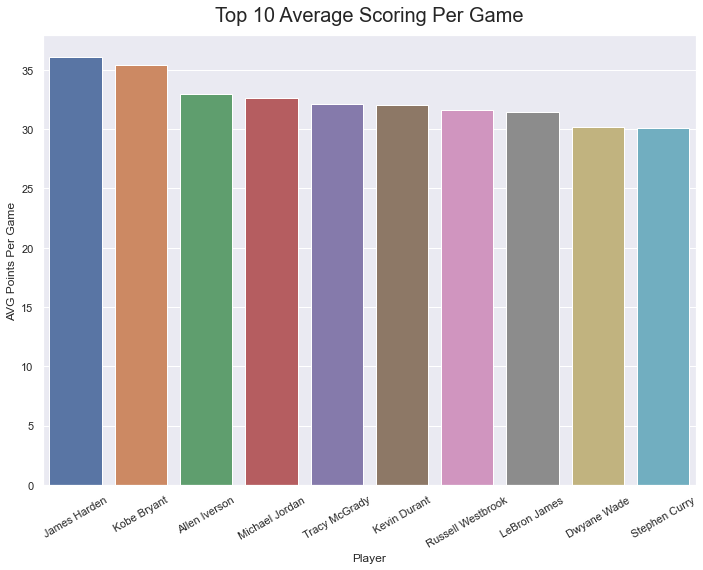

In [44]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.barplot(data=top_10_scoring ,x='Player',y='PTS')
ax.set_title("Top 10 Average Scoring Per Game", fontdict={'fontsize':20}, pad=14)
ax.tick_params(axis='x', rotation=30)
ax.set(ylabel='AVG Points Per Game')

Most AVG Points scored each year.

In [41]:
mppy = stats.groupby('Year').apply(lambda df: df.sort_values('PTS', ascending=False).head(1))

Text(0.5, 1.0, 'Most Points per Year')

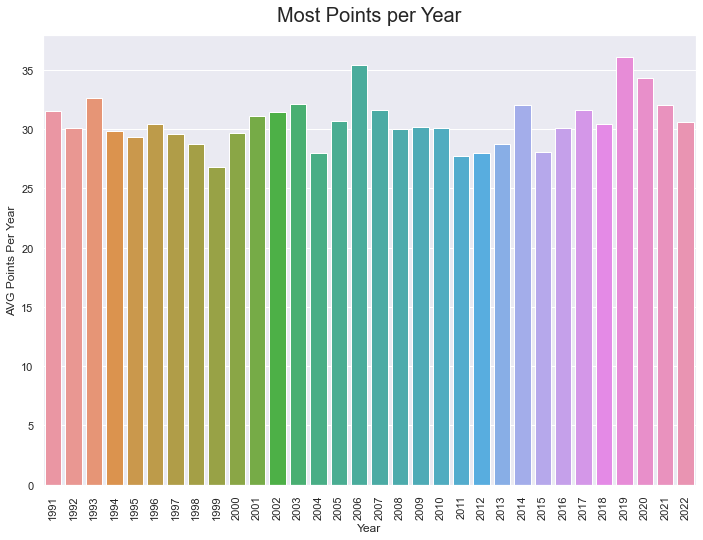

In [45]:
ax = sns.barplot(data=mppy ,x='Year',y='PTS')
ax.tick_params(axis='x', rotation=90)
ax.set(ylabel='AVG Points Per Year')
ax.set_title("Most Points per Year", fontdict={'fontsize':20}, pad=14)

My goal is to predict the next MVP.

So let's take a look at the correlation to the share of votes to MVP of each stat.

C:\Users\omri8\AppData\Local\Temp\ipykernel_6936\2554377795.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(stats.corr()[['Share']].sort_values('Share',ascending=False),annot=True, vmin=-1, vmax=1, cmap='BrBG')


Text(0.5, 1.0, 'Correlation to Share of Votes to MVP')

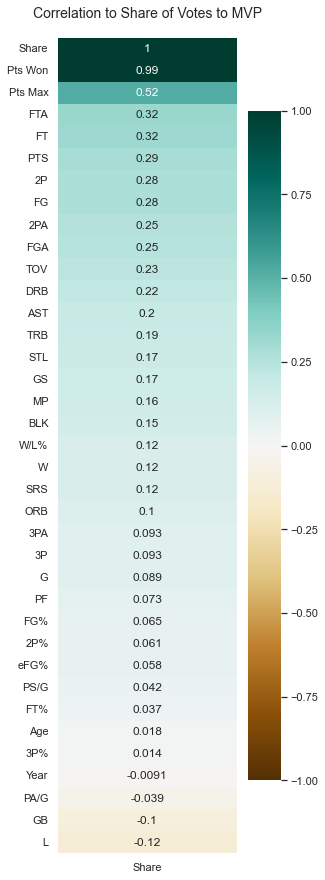

In [46]:
plt.figure(figsize=(4, 15))
ax = sns.heatmap(stats.corr()[['Share']].sort_values('Share',ascending=False),annot=True, vmin=-1, vmax=1, cmap='BrBG')
ax.set_title("Correlation to Share of Votes to MVP", fontdict={'fontsize':14}, pad=20)